In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import numpy as np 
import pandas as pd 
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn
import random 
import time 

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle


This is a very basic example of a construction of a neural network that allows for a multiclass classification with tensorflow keras.

In [8]:
data = pd.read_csv('color_pedigree.csv')
data

,base_color_male,with_white_male,base_color_female,with_white_female,prediction_color
0,black,1,black,0,black
1,black,0,black,1,black
2,black,1,black,1,black
3,black,0,black,0,black
4,blue,0,blue,0,blue
...,...,...,...,...,...
123,creme,0,red,1,red
124,creme,0,creme,1,creme
125,creme,0,black tortie,1,black tortie
126,creme,0,black tortie,1,red



We are going to separate the data. One part will be used to make predictions in the end, the other part, the most important will be used for training and testing the neural network.
This part is not mandatory, but it is for fun, and especially to show how to predict from an input.

In [9]:
data[data['base_color_male'] == 'creme'] = 'silver'
data[data['base_color_male'] == 'gray'] = 'gray'

In [10]:
class_labels = df['prediction_color'].unique()
class_labels

NameError: name 'df' is not defined

In [80]:
data = shuffle(data)


i = 8
data_to_predict = data.reset_index(drop = True)
predict_species = data_to_predict.prediction_color 
predict_species = np.array(predict_species)
prediction = np.array(data_to_predict.drop(['prediction_color'],axis= 1))

data = data.reset_index(drop = True)





In [102]:
X = data.drop(['prediction_color'], axis = 1)
X = np.array(X)
Y = data['prediction_color']





We must transform the column of classes, because we have a format 'str', and it is a multiclass situation. We must first convert the names of species into numerical values, then into vectors for the output of the neuron network. 


In [104]:
X.shape

(128, 12)

In [82]:
# Transform name species into numerical values 
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)
#print(Y)

# We have 3 classes : the output looks like : 
#0,0,1 : Class 1
#0,1,0 : Class 2
#1,0,0 : Class 3

In [83]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.1, random_state = 0)

In [91]:
len(data.columns) - 1

4

In [92]:
len(data.columns)

5


It's time to build our neural network. The dimension in input is the number of features of the dataframe (without the class to predict!).

We are on a multiclass classification situation, so the activation function for the last most suitable layer is "softmax", and "categorical_crossentropy" for the loss.

We have to do several tests to find the best architecture, but this one works pretty well

In [94]:
input_dim = len(data.columns) - 1

model = Sequential()
model.add(Dense(8, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_x, train_y, epochs = 20, batch_size = 2)


Epoch 1/20
58/58 [==============================] - 0s 2ms/step - loss: 1.7084 - accuracy: 0.2696
Epoch 2/20
58/58 [==============================] - 0s 1ms/step - loss: 1.5031 - accuracy: 0.4000
Epoch 3/20
58/58 [==============================] - 0s 1ms/step - loss: 1.3635 - accuracy: 0.4174
Epoch 4/20
58/58 [==============================] - 0s 1ms/step - loss: 1.2327 - accuracy: 0.4522
Epoch 5/20
58/58 [==============================] - 0s 1ms/step - loss: 1.0966 - accuracy: 0.5217
Epoch 6/20
58/58 [==============================] - 0s 1ms/step - loss: 0.9781 - accuracy: 0.6957
Epoch 7/20
58/58 [==============================] - 0s 1ms/step - loss: 0.8707 - accuracy: 0.6957
Epoch 8/20
58/58 [==============================] - 0s 1ms/step - loss: 0.7772 - accuracy: 0.7043
Epoch 9/20
58/58 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.7391
Epoch 10/20
58/58 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7565
Epoch 11/20
58/58 [


It is time to make predictions with the small sample removed from the base at the beginning.
To train the neural network it was necessary to convert the species into vectors. So after the prediction it is necessary to carry out the opposite operation to recover the name of the associated species

In [100]:
predictions = model.predict([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_ = encoder.inverse_transform(prediction_)

for i, j in zip(prediction_ , predict_species):
    print( " the nn predict {}, and the species to find is {}".format(i,j))

 the nn predict black, and the species to find is black tortie


In [96]:
train_x[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

# Experiment 2

In [87]:
df = pd.read_csv('color_pedigree.csv')

In [88]:
df.head()

,base_color_male,with_white_male,base_color_female,with_white_female,prediction_color
0,black,1,black,0,black
1,black,0,black,1,black
2,black,1,black,1,black
3,black,0,black,0,black
4,blue,0,blue,0,blue


In [89]:
df['base_color_male'] = df['base_color_male'].replace({'blue': 'gray', 'red': 'orange', 'creme': 'silver'})

In [90]:
df['base_color_female'] = df['base_color_female'].replace({'blue tortie': 'gray tortie', 'blue': 'gray', 'red': 'orange', 'creme': 'silver'})

In [91]:
df['prediction_color'] = df['prediction_color'].replace({'blue tortie': 'gray tortie', 'blue': 'gray', 'creme':'silver','red':'orange'})

In [92]:
df['prediction_color'].unique()

array(['black', 'gray', 'orange', 'silver', 'black tortie', 'gray tortie'],
      dtype=object)

In [93]:
df['base_color_male'].unique()

array(['black', 'gray', 'orange', 'silver'], dtype=object)

In [94]:
df['base_color_male'] = df['base_color_male'].map({'black':0,'gray':1, 'orange':2,'silver':3}).astype(float)

In [95]:
df['base_color_female'].unique()

array(['black', 'gray', 'orange', 'silver', 'black tortie', 'gray tortie'],
      dtype=object)

In [96]:
df['base_color_female'] = df['base_color_female'].map({'black':0,'gray':1, 'orange':2,'silver':3, 'black tortie':4, 'gray tortie': 5}).astype(float)

In [97]:
df['prediction_color'].unique()

array(['black', 'gray', 'orange', 'silver', 'black tortie', 'gray tortie'],
      dtype=object)

In [98]:
df['with_white_male'] = df['with_white_male'].astype(float)
df['with_white_female'] = df['with_white_female'].astype(float)

In [99]:
X = df.drop(['prediction_color'], axis = 1)
Y = df['prediction_color']

In [100]:
X

,base_color_male,with_white_male,base_color_female,with_white_female
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
123,3.0,0.0,2.0,1.0
124,3.0,0.0,3.0,1.0
125,3.0,0.0,4.0,1.0
126,3.0,0.0,4.0,1.0


In [101]:
Y

0             black
1             black
2             black
3             black
4              gray
           ...     
123          orange
124          silver
125    black tortie
126          orange
127     gray tortie
Name: prediction_color, Length: 128, dtype: object

In [102]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)

In [103]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3)

In [104]:
model = Sequential()
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(132, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'] )

history = model.fit(X_train, y_train, epochs = 1000, batch_size = 2)


Epoch 1/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.6583 - accuracy: 0.3596
Epoch 2/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.5376 - accuracy: 0.3596
Epoch 3/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.4338 - accuracy: 0.4157
Epoch 4/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.3743 - accuracy: 0.4157
Epoch 5/1000
45/45 [==============================] - 0s 2ms/step - loss: 1.2798 - accuracy: 0.5056
Epoch 6/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.2204 - accuracy: 0.5281
Epoch 7/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.1848 - accuracy: 0.5169
Epoch 8/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.1350 - accuracy: 0.5056
Epoch 9/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.0994 - accuracy: 0.4944
Epoch 10/1000
45/45 [==============================] - 0s 1ms/step - loss: 1.0533 - accuracy: 0.5169

45/45 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.7753
Epoch 83/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8202
Epoch 84/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8315
Epoch 85/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.7978
Epoch 86/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8090
Epoch 87/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8202
Epoch 88/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8315
Epoch 89/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8202
Epoch 90/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8539
Epoch 91/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.7978
Epoc

45/45 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.8652
Epoch 163/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2297 - accuracy: 0.8764
Epoch 164/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.8764
Epoch 165/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2130 - accuracy: 0.8989
Epoch 166/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.8764
Epoch 167/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.8876
Epoch 168/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.8652
Epoch 169/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9101
Epoch 170/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.8989
Epoch 171/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1399 - accuracy: 0.8989
Epoch 243/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.8989
Epoch 244/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.8764
Epoch 245/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.8989
Epoch 246/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1329 - accuracy: 0.8989
Epoch 247/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1399 - accuracy: 0.8652
Epoch 248/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9101
Epoch 249/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1356 - accuracy: 0.8876
Epoch 250/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.8989
Epoch 251/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9101
Epoch 323/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.8652
Epoch 324/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.9101
Epoch 325/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.8989
Epoch 326/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9101
Epoch 327/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9213
Epoch 328/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1804 - accuracy: 0.9326
Epoch 329/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.8989
Epoch 330/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.8764
Epoch 331/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.8652
Epoch 403/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.8764
Epoch 404/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.8876
Epoch 405/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.8989
Epoch 406/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.8989
Epoch 407/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1182 - accuracy: 0.8989
Epoch 408/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9101
Epoch 409/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.8989
Epoch 410/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.8989
Epoch 411/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9101
Epoch 483/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.8876
Epoch 484/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.8989
Epoch 485/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9101
Epoch 486/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9101
Epoch 487/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.8652
Epoch 488/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.8876
Epoch 489/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.8764
Epoch 490/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9101
Epoch 491/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.8876
Epoch 563/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.8764
Epoch 564/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.8876
Epoch 565/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9101
Epoch 566/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.8876
Epoch 567/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9101
Epoch 568/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9101
Epoch 569/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.8989
Epoch 570/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9101
Epoch 571/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.8876
Epoch 643/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.8876
Epoch 644/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.8876
Epoch 645/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.8989
Epoch 646/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.8989
Epoch 647/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9101
Epoch 648/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.8652
Epoch 649/1000
45/45 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.8989
Epoch 650/1000
45/45 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.8876
Epoch 651/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9101
Epoch 723/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.8989
Epoch 724/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.9101
Epoch 725/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9101
Epoch 726/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.8989
Epoch 727/1000
45/45 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.8539
Epoch 728/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.8876
Epoch 729/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8202
Epoch 730/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8539
Epoch 731/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.

45/45 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9213
Epoch 803/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 0.8876
Epoch 804/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 0.8989
Epoch 805/1000
45/45 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.8764
Epoch 806/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.8989
Epoch 807/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.8989
Epoch 808/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.9101
Epoch 809/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9101
Epoch 810/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 0.8989
Epoch 811/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.8989
Epoch 883/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1113 - accuracy: 0.8989
Epoch 884/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9101
Epoch 885/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.8989
Epoch 886/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.8989
Epoch 887/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.8989
Epoch 888/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.8876
Epoch 889/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9101
Epoch 890/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9101
Epoch 891/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.

45/45 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.8989
Epoch 963/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.8876
Epoch 964/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.8876
Epoch 965/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.8876
Epoch 966/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.8876
Epoch 967/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.8876
Epoch 968/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9213
Epoch 969/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.8876
Epoch 970/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9101
Epoch 971/1000
45/45 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.

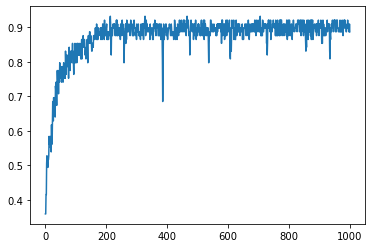

In [105]:
plt.plot(history.history['accuracy'])

# Guide for prediction

### Each color represented by numerical representation

#### Male Color with numerical representation

* black = 0
* gray = 1
* orange = 2
* silver = 3


#### Female Color with numerical representation
* black = 0 
* gray = 1
* orange = 2
* silver = 3
* black tortie = 4
* gray tortie = 5

#### Output
* black
* gray
* orange
* silver
* black tortie
* gray tortie

In [106]:
# Output Prediction
for i in range(1, len(X_test)):
    pred = model.predict(X_test)[i]
    print(np.argmax(pred))

1
2
1
5
4
1
5
4
2
1
1
1
1
4
2
1
0
1
2
1
4
1
1
1
5
2
1
0
1
1
1
1
2
1
1
2
1
0


In [107]:
# Grab the first five data from the training dataset
X_train[:5]

,base_color_male,with_white_male,base_color_female,with_white_female
94,2.0,0.0,1.0,1.0
51,1.0,1.0,3.0,1.0
118,3.0,1.0,4.0,0.0
92,2.0,1.0,5.0,0.0
88,2.0,1.0,2.0,0.0


In [108]:
# y_train[:2]
class_labels = df['prediction_color'].unique()
class_labels

array(['black', 'gray', 'orange', 'silver', 'black tortie', 'gray tortie'],
      dtype=object)

### Example

#### Lets predict the data below 
* base_color_male = <strong>black</strong>
* with_white_male = <strong>false</strong> (has no white color)

* base_color_female =<strong> gray tortie</strong>
* with_white_female = <strong>true</strong> (has white color on it)

if we were to predict above data,
then we will have to pass each value in the form of numerical  representation (see reference above)

[black, false, gray_tortie,  true]

=== after converted to numerical ===
[1, 0, 5, 1]

In [115]:
class_labels[np.argmax(model.predict([[2.0,0.0,5.0,1.0]]))]

'gray'

In [125]:
model.save('female_class_color_predict_model_v3')

INFO:tensorflow:Assets written to: female_class_color_predict_model_v3\assets


INFO:tensorflow:Assets written to: female_class_color_predict_model_v3\assets


In [126]:
# Select mode of optimization
mode = "Storage" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [127]:
# export_dir = 'model_female_color_1'
tf.saved_model.save(model, 'female_class_color_predict_model_v3')

INFO:tensorflow:Assets written to: female_class_color_predict_model_v3\assets


INFO:tensorflow:Assets written to: female_class_color_predict_model_v3\assets


In [128]:

converter = tf.lite.TFLiteConverter.from_saved_model('female_class_color_predict_model_v3')



converter.optimizations = [optimization]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.allow_custom_ops=True
tflite_model = converter.convert()

In [129]:
tflite_model_file = pathlib.Path('model_pedigree_female_3.tflite')
tflite_model_file.write_bytes(tflite_model)

17888

In [130]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()



In [131]:
with open('labels_pedigree.txt', 'w') as f:
    for label in class_labels:
        f.writelines(f'{label}\n')